# My first title in Jupyter

## A very simple operation

Let's add two numbers:

In [1]:
1+4

5

## Counter

In [2]:
for i in range(5):
    print(i)

0
1
2
3
4


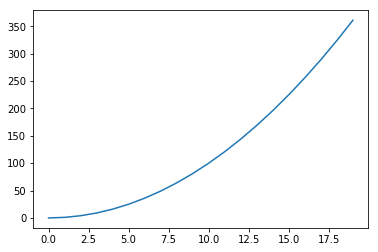

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = x**2

plt.plot(x, y)
plt.show()

In [3]:
!python --version

Python 3.6.1 :: Anaconda 4.4.0 (64-bit)


In [10]:
import numpy as np

b = np.array( [ (1.5,2,3), (4,5,6) ] )
c = np.array( [ [1.5,2,3], [4,5,6 ] ])
d = np.ones( (2,3,4) )

print(b)
print(c)
print(d)
print(d.shape)

[[ 1.5  2.   3. ]
 [ 4.   5.   6. ]]
[[ 1.5  2.   3. ]
 [ 4.   5.   6. ]]
[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]]
(2, 3, 4)


In [3]:
python -c "import sys; print(sys.getdefaultencoding())"

SyntaxError: invalid syntax (<ipython-input-3-012ecf9c46cd>, line 1)

In [4]:
import sys
sys.getdefaultencoding()

'utf-8'

In [2]:
# encoding: utf-8
# 为了 Python3 的兼容，如果你用的 Python2.7
from __future__ import print_function, division
import tensorflow as tf

print('Loaded TF version', tf.__version__, '\n\n')

# Tensor 在数学中是“张量”
# 标量，矢量/向量，张量

# 简单地理解
# 标量表示值
# 矢量表示位置（空间中的一个点）
# 张量表示整个空间

# 一维数组是矢量
# 多维数组是张量, 矩阵也是张量


# 4个重要的类型
# @Variable		计算图谱中的变量
# @Tensor		一个多维矩阵，带有很多方法
# @Graph		一个计算图谱
# @Session		用来运行一个计算图谱


# 三个重要的函数

# Variable 变量
# tf.Variable.__init__(
#	initial_value=None, @Tensor
#	trainable=True,
#	collections=None,
#	validate_shape=True,
#	caching_device=None,
#	name=None,
#	variable_def=None,
#	dtype=None)
# 注意：Variable是一个Class，Tensor也是一个Class

# Constant 常数
# tf.constant(value, dtype=None, shape=None, name='Const')
# return: a constant @Tensor

# Placeholder 暂时变量？
# tf.placeholder(dtype, shape=None, name=None)
# return: 一个还尚未存在的 @Tensor



# 让我们用计算图谱来实现一些简单的函数
# + - * / 四则运算
def basic_operation():
	v1 = tf.Variable(10)
	v2 = tf.Variable(5)
	addv = v1 + v2
	print(addv)
	print(type(addv))
	print(type(v1))

	c1 = tf.constant(10)
	c2 = tf.constant(5)
	addc = c1 + c2
	print(addc)
	print(type(addc))
	print(type(c1))

	# 用来运行计算图谱的对象/实例？
	# session is a runtime
	sess = tf.Session()

	# Variable -> 初始化 -> 有值的Tensor
	tf.initialize_all_variables().run(session=sess)

	print('变量是需要初始化的')
	print('加法(v1, v2) = ', addv.eval(session=sess))
	print('加法(v1, v2) = ', sess.run(addv))
	print('加法(c1, c2) = ', addc.eval(session=sess))
	print('\n\n')
	#这种定义操作，再执行操作的模式被称之为“符号式编程” Symbolic Programming

	# tf.Graph.__init__()
	# Creates a new, empty Graph.
	graph = tf.Graph()
	with graph.as_default():
		value1 = tf.constant([1,2])
		value2 = tf.Variable([3,4])
		mul = value1 / value2

	with tf.Session(graph=graph) as mySess:
		tf.initialize_all_variables().run()
		print('一一对应的除法(value1, value2) = ', mySess.run(mul))
		print('一一对应的除法(value1, value2) = ', mul.eval())

	# tensor.eval(session=sess)
	# sess.run(tensor)


# 省内存？placeholder才是王道
# def use_placeholder():
	graph = tf.Graph()
	with graph.as_default():
		value1 = tf.placeholder(dtype=tf.float64)
		value2 = tf.Variable([3, 4], dtype=tf.float64)
		mul = value1 * value2

	with tf.Session(graph=graph) as mySess:
		tf.initialize_all_variables().run()
		# 我们想象一下这个数据是从远程加载进来的
		# 文件，网络
		# 假装是 10 GB
		value = load_from_remote()
		for partialValue in load_partial(value, 2):
			# runResult = mySess.run(mul, feed_dict={value1: partialValue})
			evalResult = mul.eval(feed_dict={value1: partialValue})
			print('乘法(value1, value2) = ', evalResult)
		# cross validation

def load_from_remote():
	return [-x for x in range(1000)]


# 自定义的 Iterator
# yield， generator function
def load_partial(value, step):
	index = 0
	while index < len(value):
		yield value[index:index+step]
		index += step
	return

if __name__ == '__main__':
	basic_operation()
# use_placeholder()

Loaded TF version 1.2.1 


Tensor("add_2:0", shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.ops.variables.Variable'>
Tensor("add_3:0", shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
变量是需要初始化的
加法(v1, v2) =  15
加法(v1, v2) =  15
加法(c1, c2) =  15



Instructions for updating:
Use `tf.global_variables_initializer` instead.
一一对应的除法(value1, value2) =  [ 0.33333333  0.5       ]
一一对应的除法(value1, value2) =  [ 0.33333333  0.5       ]
Instructions for updating:
Use `tf.global_variables_initializer` instead.
乘法(value1, value2) =  [ 0. -4.]
乘法(value1, value2) =  [ -6. -12.]
乘法(value1, value2) =  [-12. -20.]
乘法(value1, value2) =  [-18. -28.]
乘法(value1, value2) =  [-24. -36.]
乘法(value1, value2) =  [-30. -44.]
乘法(value1, value2) =  [-36. -52.]
乘法(value1, value2) =  [-42. -60.]
乘法(value1, value2) =  [-48. -68

乘法(value1, value2) =  [-1410. -1884.]
乘法(value1, value2) =  [-1416. -1892.]
乘法(value1, value2) =  [-1422. -1900.]
乘法(value1, value2) =  [-1428. -1908.]
乘法(value1, value2) =  [-1434. -1916.]
乘法(value1, value2) =  [-1440. -1924.]
乘法(value1, value2) =  [-1446. -1932.]
乘法(value1, value2) =  [-1452. -1940.]
乘法(value1, value2) =  [-1458. -1948.]
乘法(value1, value2) =  [-1464. -1956.]
乘法(value1, value2) =  [-1470. -1964.]
乘法(value1, value2) =  [-1476. -1972.]
乘法(value1, value2) =  [-1482. -1980.]
乘法(value1, value2) =  [-1488. -1988.]
乘法(value1, value2) =  [-1494. -1996.]
乘法(value1, value2) =  [-1500. -2004.]
乘法(value1, value2) =  [-1506. -2012.]
乘法(value1, value2) =  [-1512. -2020.]
乘法(value1, value2) =  [-1518. -2028.]
乘法(value1, value2) =  [-1524. -2036.]
乘法(value1, value2) =  [-1530. -2044.]
乘法(value1, value2) =  [-1536. -2052.]
乘法(value1, value2) =  [-1542. -2060.]
乘法(value1, value2) =  [-1548. -2068.]
乘法(value1, value2) =  [-1554. -2076.]
乘法(value1, value2) =  [-1560. -2084.]
乘法(value1, v